In [20]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [25]:
x_pers=np.arange(0,700,1)
x_per=np.arange(0,6000,1)
x_pro=np.arange(0,8000,1)

In [37]:
pers_1=fuzz.trapmf(x_pers,[0,0,100,600])
pers_2=fuzz.trapmf(x_pers,[100,600,700,700])

In [38]:
per_1=fuzz.trapmf(x_per,[0,0,1000,5000])
per_2=fuzz.trapmf(x_per,[1000,5000,6000,6000])

In [39]:
pro_1=fuzz.trapmf(x_pro,[0,0,2000,7000])
pro_2=fuzz.trapmf(x_pro,[2000,7000,8000,8000])

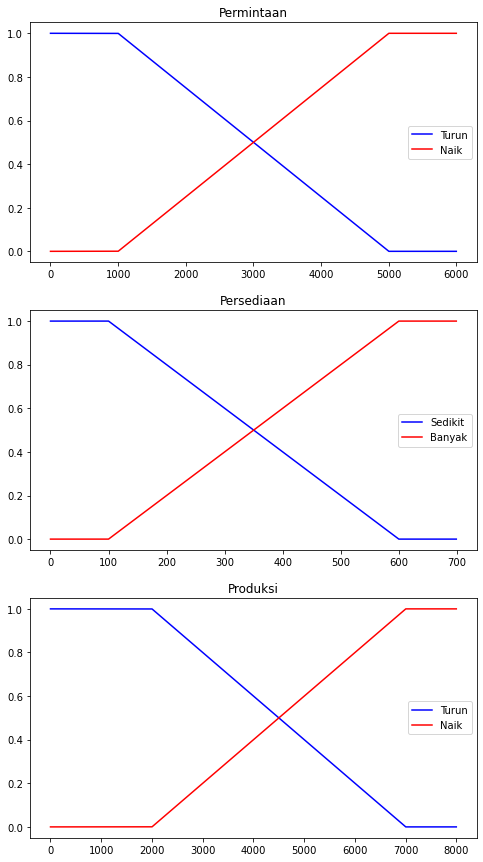

In [44]:
fig, (ax0,ax1,ax2)=plt.subplots(nrows=3,figsize=(8,15))
ax0.plot(x_per,per_1,'b',linewidth=1.5,label="Turun")
ax0.plot(x_per,per_2,'r',linewidth=1.5,label="Naik")
ax0.set_title("Permintaan")
ax0.legend()

ax1.plot(x_pers,pers_1,'b',linewidth=1.5,label="Sedikit")
ax1.plot(x_pers,pers_2,'r',linewidth=1.5,label="Banyak")
ax1.set_title("Persediaan")
ax1.legend()

ax2.plot(x_pro,pro_1,'b',linewidth=1.5,label="Turun")
ax2.plot(x_pro,pro_2,'r',linewidth=1.5,label="Naik")
ax2.set_title("Produksi")
ax2.legend()

In [47]:
#for ax in (ax0,ax1,ax2):
    #ax.spines["top"].set_visible(False)
    #ax.spines["right"].set_visible(False)
    #ax.get_xaxis().tick_bottom()
    #ax.get_yaxis().tick_left()
#plt.tight_layout()

<Figure size 432x288 with 0 Axes>

In [52]:
per_level_1=fuzz.interp_membership(x_per,per_1,4000)
per_level_2=fuzz.interp_membership(x_per,per_2,4000)

print(per_level_1)
print(per_level_2)

0.25
0.75


In [53]:
pers_level_1=fuzz.interp_membership(x_pers,pers_1,300)
pers_level_2=fuzz.interp_membership(x_pers,pers_2,300)

print(pers_level_1)
print(pers_level_2)

0.6
0.4


In [54]:
r1=np.fmin(per_level_1,pers_level_1)
r2=np.fmin(per_level_1,pers_level_2)
r3=np.fmin(per_level_2,pers_level_1)
r4=np.fmin(per_level_2,pers_level_2)
print(r1)

0.25


In [55]:
r1_=np.fmin(r1,pro_1)
r2_=np.fmin(r2,pro_1)
r3_=np.fmin(r3,pro_2)
r4_=np.fmin(r4,pro_2)
pro0=np.zeros_like(x_pro)

Text(0.5, 1.0, 'Output Membership')

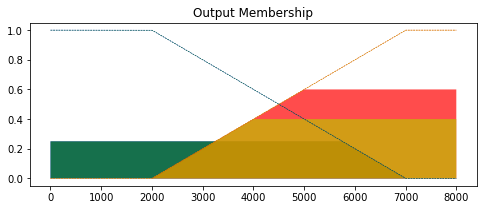

In [67]:
fig,ax0=plt.subplots(figsize=(8,3))
ax0.fill_between(x_pro,pro0,r1_,facecolor='b',alpha=0.7)
ax0.plot(x_pro,pro_1,'b',linewidth=0.5,linestyle='--',)
ax0.fill_between(x_pro,pro0,r2_,facecolor='g',alpha=0.7)
ax0.plot(x_pro,pro_1,'g',linewidth=0.5,linestyle='--',)
ax0.fill_between(x_pro,pro0,r3_,facecolor='r',alpha=0.7)
ax0.plot(x_pro,pro_2,'r',linewidth=0.5,linestyle='--',)
ax0.fill_between(x_pro,pro0,r4_,facecolor='y',alpha=0.7)
ax0.plot(x_pro,pro_2,'y',linewidth=0.5,linestyle='--',)
ax0.set_title("Output Membership")

In [69]:
aggregat=np.fmax(r1_,
                 np.fmax(r2_,
                         np.fmax(r3_,r4_)))

In [71]:
produk=fuzz.defuzz(x_pro,aggregat,"centroid")
produk_=fuzz.interp_membership(x_pro,aggregat,produk)

In [72]:
produk_

0.5639148580255974

In [73]:
produk

4819.574290127987